# Define Libraries And Control Parameters

In [1]:
#Import Necessary Libraries To Use WIth Data Processing And Analysis
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input
from keras.preprocessing.text import Tokenizer
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import models

Using TensorFlow backend.
C:\Users\muizm\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\muizm\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\muizm\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\muizm\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Obtain Data 

In [67]:
# Import Data
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# Prepare Data

In [68]:
#paramter definitions
max_words = 10000

In [69]:
#Convert Text Data To Matrix And Aplit Data Into Train And Test Sets
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(newsgroups_train["data"])
x_train = tokenizer.texts_to_matrix(newsgroups_train["data"], mode='binary')
x_test = tokenizer.texts_to_matrix(newsgroups_test["data"], mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (11314, 10000)
x_test shape: (7532, 10000)


In [70]:
num_classes = np.max(newsgroups_train["target"]) + 1
print('{} classes'.format(num_classes))

20 classes


In [71]:
y_train = keras.utils.to_categorical(newsgroups_train["target"], num_classes)
y_test = keras.utils.to_categorical(newsgroups_test["target"], num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (11314, 20)
y_test shape: (7532, 20)


## Original Model

In [50]:
original_model = models.Sequential()
original_model.add(Dense(16, activation='relu', input_shape=(max_words,)))
original_model.add(Dense(16, activation='relu'))
original_model.add(Dense(num_classes,activation='softmax'))

original_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

## Smaller Model

In [22]:
smaller_model = models.Sequential()
smaller_model.add(Dense(4, activation='relu', input_shape=(max_words,)))
smaller_model.add(Dense(num_classes, activation='softmax'))

smaller_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

## Original vs. Smaller Model

In [57]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=400,
                                   validation_split=0.1)

Train on 10182 samples, validate on 1132 samples
Epoch 1/20
10182/10182 [==============================] - 1s 121us/step - loss: 2.8422 - accuracy: 0.2008 - val_loss: 2.5988 - val_accuracy: 0.4002
Epoch 2/20
10182/10182 [==============================] - 1s 88us/step - loss: 2.2991 - accuracy: 0.5279 - val_loss: 2.0764 - val_accuracy: 0.6042
Epoch 3/20
10182/10182 [==============================] - 1s 90us/step - loss: 1.7358 - accuracy: 0.7019 - val_loss: 1.5700 - val_accuracy: 0.7217
Epoch 4/20
10182/10182 [==============================] - 1s 96us/step - loss: 1.2460 - accuracy: 0.8104 - val_loss: 1.1862 - val_accuracy: 0.7792
Epoch 5/20
10182/10182 [==============================] - 1s 95us/step - loss: 0.8907 - accuracy: 0.8750 - val_loss: 0.9398 - val_accuracy: 0.8189
Epoch 6/20
10182/10182 [==============================] - 1s 88us/step - loss: 0.6563 - accuracy: 0.9144 - val_loss: 0.7900 - val_accuracy: 0.8357
Epoch 7/20
10182/10182 [==============================] - 1s 88us/st

In [24]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=400,
                                       validation_split=0.1)

Train on 10182 samples, validate on 1132 samples
Epoch 1/20
10182/10182 [==============================] - 1s 103us/step - loss: 2.9055 - accuracy: 0.0990 - val_loss: 2.7824 - val_accuracy: 0.1431
Epoch 2/20
10182/10182 [==============================] - 1s 82us/step - loss: 2.6967 - accuracy: 0.1556 - val_loss: 2.6127 - val_accuracy: 0.1882
Epoch 3/20
10182/10182 [==============================] - 1s 81us/step - loss: 2.5287 - accuracy: 0.2462 - val_loss: 2.4681 - val_accuracy: 0.3065
Epoch 4/20
10182/10182 [==============================] - 1s 94us/step - loss: 2.3762 - accuracy: 0.3298 - val_loss: 2.3355 - val_accuracy: 0.3507
Epoch 5/20
10182/10182 [==============================] - 1s 92us/step - loss: 2.2347 - accuracy: 0.3730 - val_loss: 2.2165 - val_accuracy: 0.3887
Epoch 6/20
10182/10182 [==============================] - 1s 82us/step - loss: 2.1037 - accuracy: 0.4186 - val_loss: 2.1077 - val_accuracy: 0.4090
Epoch 7/20
10182/10182 [==============================] - 1s 97us/st

# Visual Comparison Plots

In [60]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

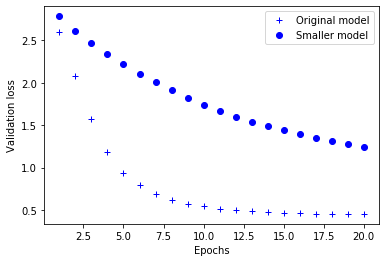

In [61]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

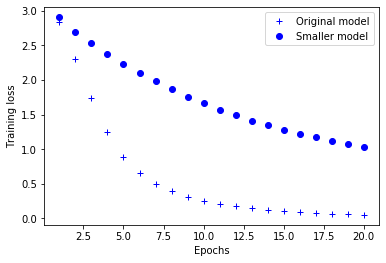

In [65]:
original_train_loss = original_hist.history['loss']
smaller_model_train_loss = smaller_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_train_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

We can see that that the smaller mdoel overfits before 15 epochs whereas the benchmark (original) model slowly converges and overfits gradually before the 20 epoch mark aswell. The performance of both models increase as the epochs approach 20 as the graphs starts to converge this indicates the model will perform better after the 20 epoch mark. Now let's create a larger model with a larger capacity. 

In [52]:
bigger_model = models.Sequential()
bigger_model.add(Dense(1024, activation='relu', input_shape=(max_words,)))
bigger_model.add(Dense(1024, activation='relu'))
bigger_model.add(Dense(num_classes, activation='softmax'))

bigger_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [53]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_split=0.1)

Train on 10182 samples, validate on 1132 samples
Epoch 1/20
10182/10182 [==============================] - 7s 679us/step - loss: 1.5288 - accuracy: 0.6313 - val_loss: 0.5397 - val_accuracy: 0.8489
Epoch 2/20
10182/10182 [==============================] - 7s 676us/step - loss: 0.2116 - accuracy: 0.9451 - val_loss: 0.4140 - val_accuracy: 0.8922
Epoch 3/20
10182/10182 [==============================] - 7s 649us/step - loss: 0.0581 - accuracy: 0.9898 - val_loss: 0.3351 - val_accuracy: 0.9081
Epoch 4/20
10182/10182 [==============================] - 7s 662us/step - loss: 0.0374 - accuracy: 0.9975 - val_loss: 0.3543 - val_accuracy: 0.8984
Epoch 5/20
10182/10182 [==============================] - 7s 651us/step - loss: 0.0152 - accuracy: 0.9985 - val_loss: 0.3233 - val_accuracy: 0.9117
Epoch 6/20
10182/10182 [==============================] - 7s 663us/step - loss: 0.0104 - accuracy: 0.9987 - val_loss: 0.3469 - val_accuracy: 0.9081
Epoch 7/20
10182/10182 [==============================] - 7s 65

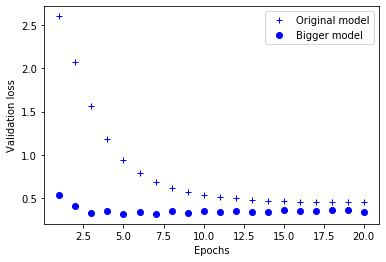

In [62]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

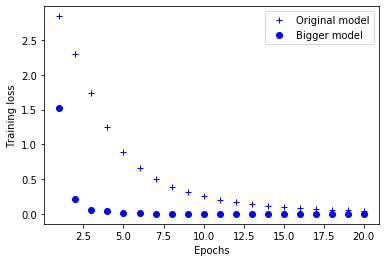

In [63]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

The bigger model approaches a training loss of near zero very quickly. The more capacity the network has, the quicker it will be able to model the training data (resulting in a low training loss), but the more vulnerable it is to overfitting (resulting in a large difference between the training and validation loss). As we now have determined how the model is fitting the data we are able to tune the model and use a logical process to determine a model that balances between underfitting and overfitting by using the infromation from abaove. The first step will be to develop a model function to call the model, plot the analysis and provide the architecture structure of the model. We will also adapt weight regularization and dropout layers to ensure we are able to prevent the model from excessively overfitting the data. However, we can see that the bigger model is underfitting and the smaller model is overfitting. 

# Define Function To Call Model

In [72]:
def create_model_dropout(nodes='nodes',epochs='epochs',batch_size='batch_size',dropout='dropout'):
    model = Sequential()
    model.add(Dense(nodes,activation='relu',input_shape=(max_words,)))
    model.add(Dropout(dropout))
    model.add(Dense(nodes,activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_classes,activation='softmax'))
    
    #compile model
    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
              
    #model history
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)
              
    #model accuracy
    score = model.evaluate(x_train, y_train,
                       batch_size=batch_size, verbose=1)
    print('Train Score:', score[0])
    print('Train Accuracy', score[1])
    
    #model stucture
    model.summary()
              
    #plots
              
    history_dict_basic = history.history
    history_dict_basic.keys()    
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)
    
    #validation loss plot
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    #validation accuracy plot
    plt.clf()   
    acc_values = history.history['accuracy']
    val_acc_values = history.history['val_accuracy']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
              
    return model
    

In [73]:
def create_model_basic(nodes='nodes',epochs='epochs',batch_size='batch_size'):
    model = Sequential()
    model.add(Dense(nodes,activation='relu',input_shape=(max_words,)))
    model.add(Dense(nodes,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    
    #compile model
    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
              
    #model history
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)
              
    #model accuracy
    score = model.evaluate(x_train, y_train,
                       batch_size=batch_size, verbose=1)
    print('Train Score:', score[0])
    print('Train Accuracy', score[1])
    
    #model stucture
    model.summary()
              
    #plots
              
    history_dict_basic = history.history
    history_dict_basic.keys()    
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)
    
    #validation loss plot
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
    #validation accuracy plot
    plt.clf()   
    acc_values = history.history['accuracy']
    val_acc_values = history.history['val_accuracy']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
              
    return model
    

Train on 10182 samples, validate on 1132 samples
Epoch 1/15
10182/10182 [==============================] - 5s 520us/step - loss: 1.7011 - accuracy: 0.6230 - val_loss: 0.6306 - val_accuracy: 0.8269
Epoch 2/15
10182/10182 [==============================] - 5s 492us/step - loss: 0.2716 - accuracy: 0.9359 - val_loss: 0.3445 - val_accuracy: 0.9019
Epoch 3/15
10182/10182 [==============================] - 5s 455us/step - loss: 0.0781 - accuracy: 0.9870 - val_loss: 0.3068 - val_accuracy: 0.9099
Epoch 4/15
10182/10182 [==============================] - 5s 487us/step - loss: 0.0292 - accuracy: 0.9973 - val_loss: 0.3071 - val_accuracy: 0.9143
Epoch 5/15
10182/10182 [==============================] - 5s 503us/step - loss: 0.0159 - accuracy: 0.9985 - val_loss: 0.3006 - val_accuracy: 0.9108
Epoch 6/15
10182/10182 [==============================] - 5s 513us/step - loss: 0.0105 - accuracy: 0.9991 - val_loss: 0.3042 - val_accuracy: 0.9117
Epoch 7/15
10182/10182 [==============================] - 5s 46

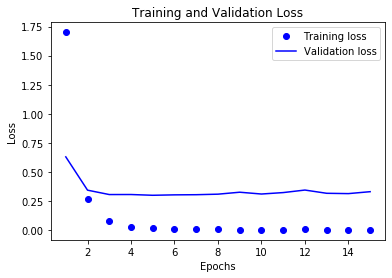

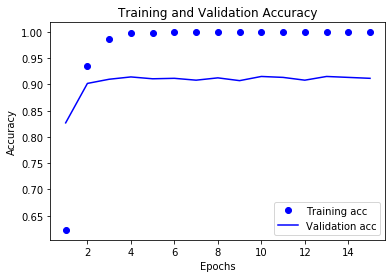

In [610]:
model1=(create_model_basic(512,15,450))

From the model above we have slightly decreased the number of epochs and slightly increase the batch size. However we can see the model is convering very quickly. We now will reduce the epochs and sustain a low batch size amount. 

Train on 10182 samples, validate on 1132 samples
Epoch 1/8
10182/10182 [==============================] - 5s 454us/step - loss: 1.7826 - accuracy: 0.5883 - val_loss: 0.6473 - val_accuracy: 0.8489
Epoch 2/8
10182/10182 [==============================] - 4s 435us/step - loss: 0.2993 - accuracy: 0.9357 - val_loss: 0.3793 - val_accuracy: 0.8949
Epoch 3/8
10182/10182 [==============================] - 4s 433us/step - loss: 0.0959 - accuracy: 0.9825 - val_loss: 0.3242 - val_accuracy: 0.9081
Epoch 4/8
10182/10182 [==============================] - 4s 436us/step - loss: 0.0363 - accuracy: 0.9958 - val_loss: 0.3091 - val_accuracy: 0.9161
Epoch 5/8
10182/10182 [==============================] - 4s 436us/step - loss: 0.0177 - accuracy: 0.9984 - val_loss: 0.3136 - val_accuracy: 0.9143
Epoch 6/8
10182/10182 [==============================] - 4s 435us/step - loss: 0.0139 - accuracy: 0.9987 - val_loss: 0.3234 - val_accuracy: 0.9099
Epoch 7/8
10182/10182 [==============================] - 4s 439us/ste

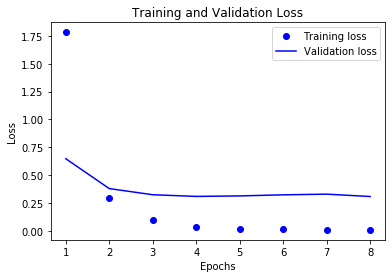

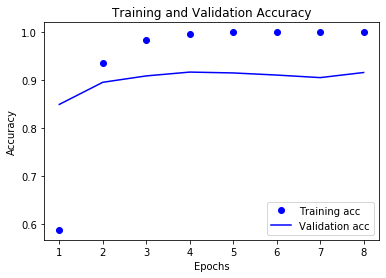

In [611]:
model2=(create_model_basic(512,8,480))

The validation accuracy has minutely increased indicating the model is performing better. Now we will add a dropout layer and see the effect of it on the model fitting. 

Train on 10182 samples, validate on 1132 samples
Epoch 1/8
10182/10182 [==============================] - 5s 489us/step - loss: 1.7413 - accuracy: 0.6113 - val_loss: 0.6934 - val_accuracy: 0.8083
Epoch 2/8
10182/10182 [==============================] - 5s 488us/step - loss: 0.3188 - accuracy: 0.9259 - val_loss: 0.3599 - val_accuracy: 0.9019
Epoch 3/8
10182/10182 [==============================] - 5s 465us/step - loss: 0.0978 - accuracy: 0.9829 - val_loss: 0.3282 - val_accuracy: 0.9002
Epoch 4/8
10182/10182 [==============================] - 5s 491us/step - loss: 0.0464 - accuracy: 0.9948 - val_loss: 0.2973 - val_accuracy: 0.9055
Epoch 5/8
10182/10182 [==============================] - 5s 504us/step - loss: 0.0203 - accuracy: 0.9984 - val_loss: 0.2862 - val_accuracy: 0.9117
Epoch 6/8
10182/10182 [==============================] - 5s 515us/step - loss: 0.0142 - accuracy: 0.9985 - val_loss: 0.2964 - val_accuracy: 0.9081
Epoch 7/8
10182/10182 [==============================] - 5s 471us/ste

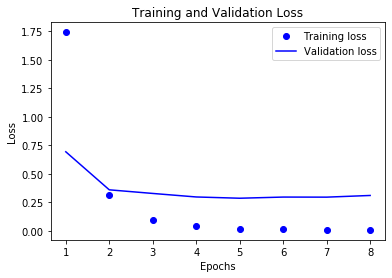

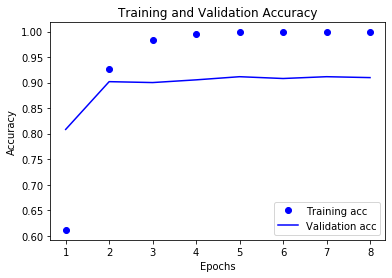

In [612]:
model3=(create_model_dropout(512,8,480,0.01))

Train on 10182 samples, validate on 1132 samples
Epoch 1/20
10182/10182 [==============================] - 9s 928us/step - loss: 1.4712 - accuracy: 0.6406 - val_loss: 0.4762 - val_accuracy: 0.8622
Epoch 2/20
10182/10182 [==============================] - 10s 941us/step - loss: 0.1913 - accuracy: 0.9524 - val_loss: 0.3474 - val_accuracy: 0.9002
Epoch 3/20
10182/10182 [==============================] - 9s 911us/step - loss: 0.0454 - accuracy: 0.9922 - val_loss: 0.3269 - val_accuracy: 0.9055
Epoch 4/20
10182/10182 [==============================] - 9s 894us/step - loss: 0.0212 - accuracy: 0.9980 - val_loss: 0.3523 - val_accuracy: 0.8984
Epoch 5/20
10182/10182 [==============================] - 10s 952us/step - loss: 0.0119 - accuracy: 0.9983 - val_loss: 0.3371 - val_accuracy: 0.9028
Epoch 6/20
10182/10182 [==============================] - 9s 867us/step - loss: 0.0085 - accuracy: 0.9991 - val_loss: 0.2950 - val_accuracy: 0.9125
Epoch 7/20
10182/10182 [==============================] - 9s 

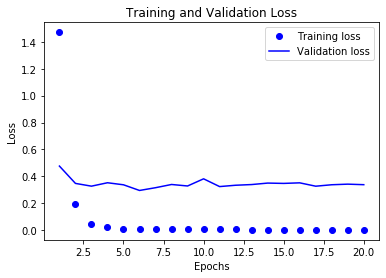

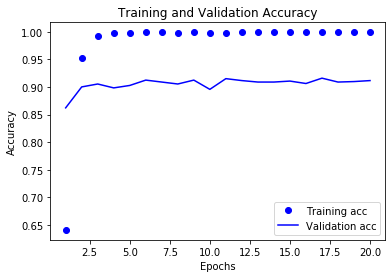

In [613]:
model4=(create_model_dropout(1024,20,500,0.01))

We'll now create a model with a larger epoch size and batch size to see the model fit over a larger range to see any clear convergence or gradual changes. 

Train on 10182 samples, validate on 1132 samples
Epoch 1/80
10182/10182 [==============================] - 5s 455us/step - loss: 1.7244 - accuracy: 0.6270 - val_loss: 0.6638 - val_accuracy: 0.8260
Epoch 2/80
10182/10182 [==============================] - 5s 466us/step - loss: 0.3001 - accuracy: 0.9301 - val_loss: 0.3524 - val_accuracy: 0.8913
Epoch 3/80
10182/10182 [==============================] - 4s 437us/step - loss: 0.0914 - accuracy: 0.9844 - val_loss: 0.3239 - val_accuracy: 0.9117
Epoch 4/80
10182/10182 [==============================] - 5s 473us/step - loss: 0.0359 - accuracy: 0.9965 - val_loss: 0.2974 - val_accuracy: 0.9143
Epoch 5/80
10182/10182 [==============================] - 4s 437us/step - loss: 0.0192 - accuracy: 0.9982 - val_loss: 0.2919 - val_accuracy: 0.9143
Epoch 6/80
10182/10182 [==============================] - 5s 469us/step - loss: 0.0106 - accuracy: 0.9992 - val_loss: 0.2891 - val_accuracy: 0.9170
Epoch 7/80
10182/10182 [==============================] - 5s 47

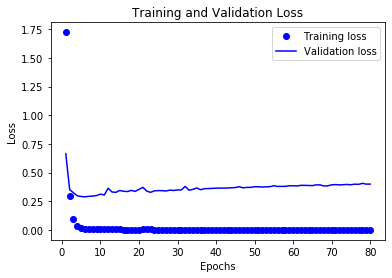

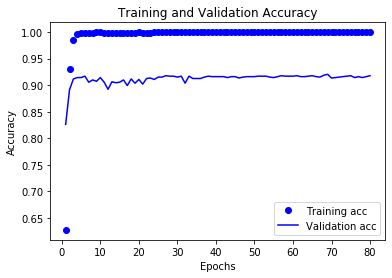

In [614]:
model5=create_model_basic(512,80,480)

We can see from the plots above that the valdiation accuracy of the model steadys off after the 10-15th epoch inidcating that a model with a larger epoch size then 15 will start to overfit and not provide the best model. 

Train on 10182 samples, validate on 1132 samples
Epoch 1/20
10182/10182 [==============================] - 10s 937us/step - loss: 1.9296 - accuracy: 0.4831 - val_loss: 0.6621 - val_accuracy: 0.8118
Epoch 2/20
10182/10182 [==============================] - 9s 874us/step - loss: 0.4195 - accuracy: 0.8860 - val_loss: 0.3921 - val_accuracy: 0.8807
Epoch 3/20
10182/10182 [==============================] - 9s 872us/step - loss: 0.1339 - accuracy: 0.9684 - val_loss: 0.3083 - val_accuracy: 0.9081
Epoch 4/20
10182/10182 [==============================] - 9s 868us/step - loss: 0.0558 - accuracy: 0.9911 - val_loss: 0.3027 - val_accuracy: 0.9125
Epoch 5/20
10182/10182 [==============================] - 9s 873us/step - loss: 0.0256 - accuracy: 0.9961 - val_loss: 0.2999 - val_accuracy: 0.9161
Epoch 6/20
10182/10182 [==============================] - 9s 868us/step - loss: 0.0193 - accuracy: 0.9976 - val_loss: 0.3022 - val_accuracy: 0.9143
Epoch 7/20
10182/10182 [==============================] - 9s 8

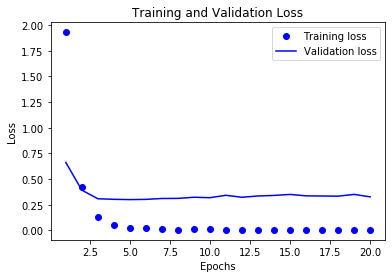

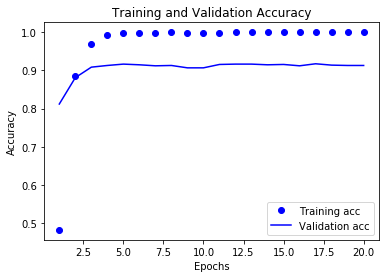

In [616]:
model6=create_model_dropout(1024,20,480,0.4)

From the model above we can see that we are starting to refien the model to a godo overfit to udner fit ratio indicating a good model fit. From the results above the model is fitting better at epoch 12 than 20 as also seen in the graph. We will now try with 12 epochs and see the results. 

Train on 10182 samples, validate on 1132 samples
Epoch 1/12
10182/10182 [==============================] - 10s 937us/step - loss: 1.9678 - accuracy: 0.4842 - val_loss: 0.7342 - val_accuracy: 0.7898
Epoch 2/12
10182/10182 [==============================] - 9s 890us/step - loss: 0.4321 - accuracy: 0.8872 - val_loss: 0.3780 - val_accuracy: 0.8913
Epoch 3/12
10182/10182 [==============================] - 9s 865us/step - loss: 0.1398 - accuracy: 0.9686 - val_loss: 0.3286 - val_accuracy: 0.9011
Epoch 4/12
10182/10182 [==============================] - 9s 858us/step - loss: 0.0648 - accuracy: 0.9900 - val_loss: 0.3136 - val_accuracy: 0.9090
Epoch 5/12
10182/10182 [==============================] - 9s 865us/step - loss: 0.0309 - accuracy: 0.9949 - val_loss: 0.3424 - val_accuracy: 0.9055
Epoch 6/12
10182/10182 [==============================] - 9s 862us/step - loss: 0.0196 - accuracy: 0.9972 - val_loss: 0.3234 - val_accuracy: 0.9099
Epoch 7/12
10182/10182 [==============================] - 9s 8

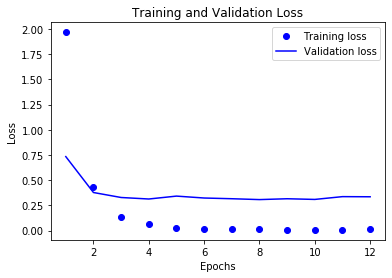

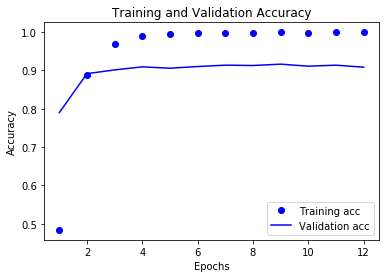

In [618]:
model7=create_model_dropout(1024,12,480,0.4)

The model is still providing a reasonable validation accuracy set of results. However, we need to remember that using a large batch size can have a negative effect on the accuracy of your network during training since it reduces the stochasticity of the gradient descent. We'll now try with a smaller batch size to see the effect. 

Train on 10182 samples, validate on 1132 samples
Epoch 1/12
10182/10182 [==============================] - 5s 514us/step - loss: 2.2897 - accuracy: 0.3812 - val_loss: 0.9790 - val_accuracy: 0.7995
Epoch 2/12
10182/10182 [==============================] - 5s 456us/step - loss: 0.7030 - accuracy: 0.8177 - val_loss: 0.4477 - val_accuracy: 0.8799
Epoch 3/12
10182/10182 [==============================] - 5s 457us/step - loss: 0.2756 - accuracy: 0.9307 - val_loss: 0.3439 - val_accuracy: 0.8984
Epoch 4/12
10182/10182 [==============================] - 5s 456us/step - loss: 0.1328 - accuracy: 0.9717 - val_loss: 0.2919 - val_accuracy: 0.9161
Epoch 5/12
10182/10182 [==============================] - 5s 455us/step - loss: 0.0681 - accuracy: 0.9877 - val_loss: 0.2871 - val_accuracy: 0.9143
Epoch 6/12
10182/10182 [==============================] - 5s 457us/step - loss: 0.0434 - accuracy: 0.9939 - val_loss: 0.2898 - val_accuracy: 0.9108
Epoch 7/12
10182/10182 [==============================] - 5s 45

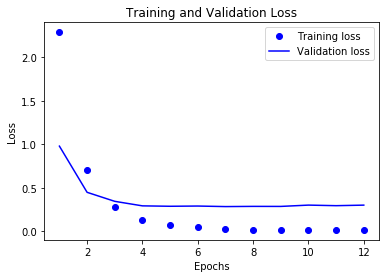

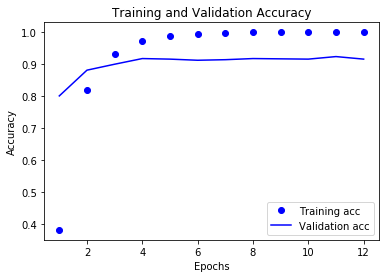

In [629]:
model8=create_model_dropout(512,12,480,0.4)

We'll now determine the effect of a reduced dropout rate on the same parameters. 

Train on 10182 samples, validate on 1132 samples
Epoch 1/12
10182/10182 [==============================] - 5s 501us/step - loss: 1.8152 - accuracy: 0.5827 - val_loss: 0.6296 - val_accuracy: 0.8525
Epoch 2/12
10182/10182 [==============================] - 5s 479us/step - loss: 0.3357 - accuracy: 0.9213 - val_loss: 0.3618 - val_accuracy: 0.9002
Epoch 3/12
10182/10182 [==============================] - 5s 482us/step - loss: 0.1117 - accuracy: 0.9776 - val_loss: 0.3228 - val_accuracy: 0.8940
Epoch 4/12
10182/10182 [==============================] - 5s 488us/step - loss: 0.0453 - accuracy: 0.9944 - val_loss: 0.3071 - val_accuracy: 0.9055
Epoch 5/12
10182/10182 [==============================] - 5s 512us/step - loss: 0.0227 - accuracy: 0.9978 - val_loss: 0.3152 - val_accuracy: 0.9046
Epoch 6/12
10182/10182 [==============================] - 5s 507us/step - loss: 0.0145 - accuracy: 0.9988 - val_loss: 0.3304 - val_accuracy: 0.9055
Epoch 7/12
10182/10182 [==============================] - 5s 50

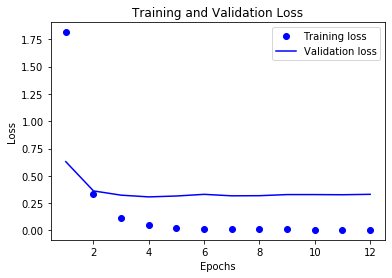

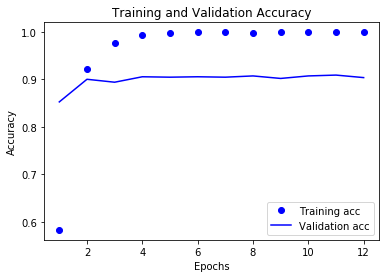

In [631]:
model9=create_model_dropout(512,12,480,0.1)

We are able to instantly see a rapid decline in loss. This indicates the model is fitting better and is reducing overfitting. We'll now decrease the epochs to 10 as this is showing a higher validation accuracy. 

Train on 10182 samples, validate on 1132 samples
Epoch 1/20
10182/10182 [==============================] - 5s 534us/step - loss: 1.8129 - accuracy: 0.5735 - val_loss: 0.6460 - val_accuracy: 0.8463
Epoch 2/20
10182/10182 [==============================] - 5s 534us/step - loss: 0.3484 - accuracy: 0.9174 - val_loss: 0.4001 - val_accuracy: 0.8790
Epoch 3/20
10182/10182 [==============================] - 5s 519us/step - loss: 0.1130 - accuracy: 0.9799 - val_loss: 0.3353 - val_accuracy: 0.9090
Epoch 4/20
10182/10182 [==============================] - 5s 533us/step - loss: 0.0445 - accuracy: 0.9945 - val_loss: 0.3244 - val_accuracy: 0.9064
Epoch 5/20
10182/10182 [==============================] - 6s 541us/step - loss: 0.0243 - accuracy: 0.9980 - val_loss: 0.3186 - val_accuracy: 0.9064
Epoch 6/20
10182/10182 [==============================] - 6s 551us/step - loss: 0.0174 - accuracy: 0.9982 - val_loss: 0.3254 - val_accuracy: 0.9125
Epoch 7/20
10182/10182 [==============================] - 6s 57

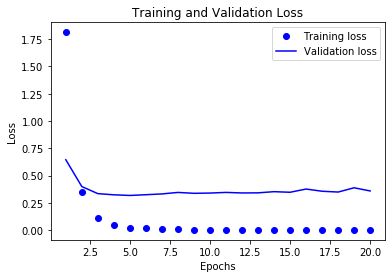

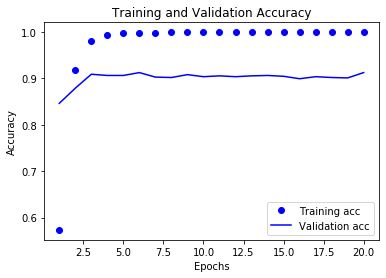

In [632]:
model10=create_model_dropout(512,20,480,0.1)

In [728]:
score=model10.evaluate(x_test,y_test,batch_size=512,verbose=1)
print('Test Accuracy',score[1])
print('Test Score',score[0])

7532/7532 [==============================] - 1s 158us/step
Test Accuracy 0.8155868053436279
Test Score 0.9847099323318287


The model has seemed to improve signifcantly throughout the process and model10 has shown the best results in terms of its ratio of loss to validation accuracy indicating the model is approaching a balance and hence is finding the middle ground between the overfit and underfit range as was established in the beginning.However we have a large amount of paramaters of this model and the aim is to have the least amount of paramaters, we will now reduce the batch size and keep everything else constant to reduce the number of parameters.

Train on 10182 samples, validate on 1132 samples
Epoch 1/20
10182/10182 [==============================] - 3s 341us/step - loss: 2.1924 - accuracy: 0.4871 - val_loss: 0.9931 - val_accuracy: 0.8330
Epoch 2/20
10182/10182 [==============================] - 3s 303us/step - loss: 0.6194 - accuracy: 0.8718 - val_loss: 0.4686 - val_accuracy: 0.8816
Epoch 3/20
10182/10182 [==============================] - 3s 294us/step - loss: 0.2294 - accuracy: 0.9557 - val_loss: 0.3577 - val_accuracy: 0.9011
Epoch 4/20
10182/10182 [==============================] - 3s 291us/step - loss: 0.1129 - accuracy: 0.9828 - val_loss: 0.3190 - val_accuracy: 0.9072
Epoch 5/20
10182/10182 [==============================] - 3s 310us/step - loss: 0.0606 - accuracy: 0.9931 - val_loss: 0.3157 - val_accuracy: 0.9046
Epoch 6/20
10182/10182 [==============================] - 3s 295us/step - loss: 0.0361 - accuracy: 0.9973 - val_loss: 0.3001 - val_accuracy: 0.9072
Epoch 7/20
10182/10182 [==============================] - 3s 32

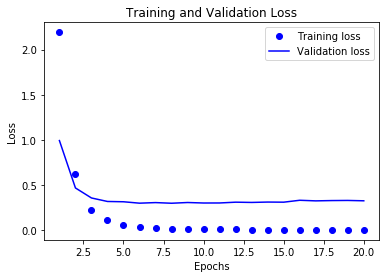

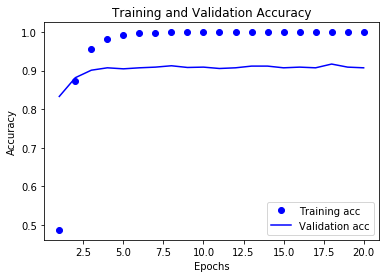

In [78]:
model11=create_model_dropout(256,20,480,0.1)

In [83]:
score11=model11.evaluate(x_test,y_test,batch_size=512,verbose=1)
print('Test Accuracy',score[1])
print('Test Score',score[0])

7532/7532 [==============================] - 1s 153us/step
Test Accuracy 0.8147902488708496
Test Score 0.8189043370068105


In [81]:
model11.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 256)               2560256   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 20)                5140      
Total params: 2,631,188
Trainable params: 2,631,188
Non-trainable params: 0
_________________________________________________________________


In [86]:
print('Best score  Batch size   Epochs')
print("%.2f%% %10i %10i" % (score11[1]*100,512,20))

Best score  Batch size   Epochs
81.48%        512         20


We have been able to reduce our total number of parameters from just over 5 milliom to just over 2 million allowing us to furher refine our model. 